Load pandas and numpy first. Then load the datasets.


In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.3f' % x)

responded_table = pd.read_csv('C:/Users/.../Responded_Table.csv')
sent_table= pd.read_csv('C:/Users/../Sent_Table.csv')
ub = pd.read_csv('C:/Users/../UB.csv')


Q1.Provide the Average, Median, Q1, Q3, Min, Max and the Mode of Age variable

In [35]:
ub['Age'].describe()

count   500000.000
mean        31.619
std          6.708
min         18.000
25%         27.000
50%         31.000
75%         36.000
max         63.000
Name: Age, dtype: float64

In [ ]:
ub['Age'].value_counts()

so the average is 31.62 (approximately) the median is 31, the minimun value is 18, the maximum is 63. Q1 is 27 and Q3 is 36.The most common Age value (mode) is 31.

Q2: Provide a Histogram of the Tenure variable. What can you say about the distribution? 

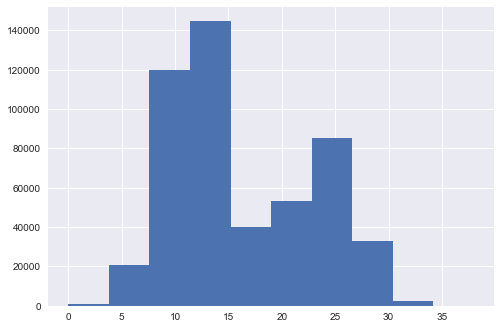

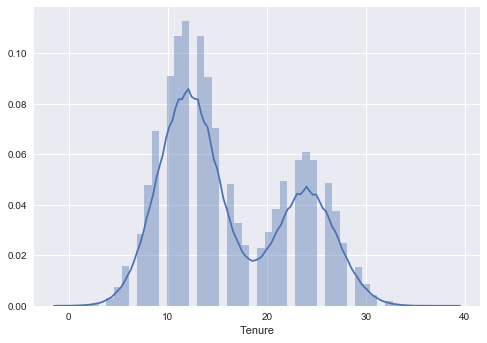

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(ub.Tenure)
plt.show()
sns.distplot(ub.Tenure)
plt.show()

The histogram shows us that, this is not a normal distribution. The 'Tenure' variable follows a bimodal distribution as different local peaks are observed. The distplot gives a different view of that statement.

Q3: Provide a 95% Confidence Interval of the Tenure. Can we claim that the average Tenure of the Userbase is 17 months?

Since the Tenure variable doesn't follow a normal distribution we have to check if the mean value is a good indicator for us to calculate the Confidence Interval. Let's take a look to the mean, the median and the std.

In [3]:
ub['Tenure'].describe()

count   500000.000
mean        16.193
std          6.468
min          0.000
25%         11.000
50%         14.000
75%         22.000
max         38.000
Name: Tenure, dtype: float64

Notice that mean differs from the median. Also, we should check the mode value.

In [14]:
ub['Tenure'].value_counts()

12    42842
13    40663
11    40607
10    34599
14    34484
15    26770
9     26321
24    23104
23    22000
25    21884
22    18712
26    18413
16    18367
8     18130
21    14576
27    14249
17    12524
20    11031
7     10860
28     9451
18     9128
19     8762
6      5918
29     5838
30     3248
5      2886
31     1558
4      1231
32      670
3       493
33      289
2       178
34       95
1        71
0        17
35       16
36       14
38        1
Name: Tenure, dtype: int64

See that most common value is 12 months. Furthermore, the median is also very common (in the top 5 values). On the other hand, mean's frequency is relatively low. We expect a confidence interval with the median to be more accurate in our case.

In [4]:
from scipy import stats
conf_int = stats.norm.interval(0.95,loc = ub['Tenure'].median())
print(conf_int)

(12.040036015459947, 15.959963984540053)


Q4. Calculate the Average Age and the Proportion of Customers per Gender and Type. 

In [5]:
#Q4
groupped =  ub[['Age','Type','Gender']].groupby(['Gender','Type'],as_index=False).mean()
group_cust =  ub[['Customer_ID','Type','Gender']].groupby(['Gender','Type'],as_index=False).count()
group_cust ['Proportion of customers(%)'] = (group_cust['Customer_ID']/len(ub))*100
group_cust = group_cust.drop('Customer_ID', axis =1)
groupped = pd.merge(groupped,group_cust,on=['Type', 'Gender'], how='left')
groupped = groupped.rename(columns ={'Age':'Average Age'})
print(groupped)


  Gender Type  Average Age  Proportion of customers(%)
0      F    B       37.970                       6.963
1      F    C       30.032                      28.031
2      M    B       37.984                      12.976
3      M    C       30.036                      52.030


The groupped dataframe provides a table with the following columns:  Gender,Type, Average Age, Proportion of Customers. As we can see more than the half of our customers are men consumers and their average age is about 30years old.

Q5: Calculate the Number of Customers per Email Domain. 

In [6]:
#Q5
ub['Email_Domain']= ub['Email_Address'].apply(lambda x: x.split('@')[1])
group_Domain = ub[['Email_Domain','Customer_ID']].groupby(['Email_Domain'], as_index=False).count()
group_Domain = group_Domain.rename(columns ={'Customer_ID':'Number of Customers'})
print (group_Domain)

  Email_Domain  Number of Customers
0      aol.com                49975
1  comcast.net                34820
2    gmail.com               150266
3  hotmail.com               125482
4      msn.com                74626
5    yahoo.com                64831


the group_Domain dataframe provides a table  with  two columns: Email Domain, Number of Customers

Q6:Calculate the Average Number of Subject Lines Sent per Weekday

In [7]:
from datetime import date
import calendar
my_date=date.today()
calendar.day_name[my_date.weekday()]

sent_table['Sent_Date'] = pd.to_datetime(sent_table['Sent_Date'])
sent_table['Weekday'] =sent_table['Sent_Date'].dt.weekday_name

group_weekday = sent_table[['SubjectLine_ID','Weekday']].groupby(['Weekday'], as_index=False).mean()
group_weekday = group_weekday.rename(columns ={'SubjectLine_ID':'Average Number of Emails Sent'})

print(group_weekday)

     Weekday  Average Number of Emails Sent
0     Friday                          1.999
1     Monday                          2.000
2   Saturday                          1.999
3     Sunday                          1.999
4   Thursday                          2.001
5    Tuesday                          1.999
6  Wednesday                          1.997


The group_weekday dataframe contains two columns. Weekdays and Average Number of Emails Sent.

Q7: Calculate the Average Open Rate by SubjectLine_ID considering as valid responses ONLY those Emails which were Opened at the Sent Date. What can you say about the performance of the messages? 

In [8]:
#Transform the 'Responded_Date'column into datetime format
responded_table['Responded_Date'] = pd.to_datetime(responded_table['Responded_Date'])
#Inner join sent_table and responded_table on SubjectLine_ID and Customer_ID
merged_df = pd.merge(sent_table, responded_table, on=['SubjectLine_ID', 'Customer_ID'], how='inner')

##Create a validation variable (1 when the response is valid and 0 when it's not)
merged_df['Valid_Response'] = np.where((merged_df['Responded_Date'] == merged_df['Sent_Date']),1,0)

grouped_open_rate = merged_df[['SubjectLine_ID','Valid_Response']].groupby(['SubjectLine_ID'],as_index = False).sum()

grouped_open_rate['Average Open Rate (%)'] = (grouped_open_rate['Valid_Response']/len(merged_df))*100
grouped_open_rate = grouped_open_rate.drop('Valid_Response', axis=1)
print(grouped_open_rate)

   SubjectLine_ID  Average Open Rate (%)
0               1                  7.996
1               2                  7.925
2               3                  7.072


,Sent_Date,Customer_ID,SubjectLine_ID,Weekday,Responded_Date,Valid_Response
0,2016-01-28,1413,2,Thursday,2016-01-31,0
1,2016-01-03,1413,2,Sunday,2016-01-31,0
2,2016-02-03,192123,3,Wednesday,2016-02-04,0
3,2016-03-22,192123,3,Tuesday,2016-02-04,0
4,2016-02-07,399506,2,Sunday,2016-03-24,0


The best performing e-mail is SubjectLine_ID 1 which is responded about 8%. In general, all three e-mails are responded around 7-8%. We cannot say that there is a great difference on our e-mail performance for depending on the e-mail type.

Q8:Calculate the Average Open Rate by Type considering as valid responses ONLY those Subject Lines which were Opened at the Sent Date

In [9]:
merged_df = pd.merge(merged_df, ub, on=['Customer_ID'])

merged_df.head(2)

,Sent_Date,Customer_ID,SubjectLine_ID,Weekday,Responded_Date,Valid_Response,Gender,Type,Email_Address,Age,Tenure,Email_Domain
0,2016-01-28,1413,2,Thursday,2016-01-31,0,M,B,Jaj2NuUJneD@gmail.com,44,12,gmail.com
1,2016-01-03,1413,2,Sunday,2016-01-31,0,M,B,Jaj2NuUJneD@gmail.com,44,12,gmail.com


In [10]:
open_rate_by_type = merged_df[['Type','Valid_Response']].groupby(['Type'],as_index = False).sum()
open_rate_by_type['Avg.Open Rate(%)'] = (open_rate_by_type['Valid_Response']/len(merged_df))*100
open_rate_by_type = open_rate_by_type.drop('Valid_Response', axis =1)

print(open_rate_by_type)


  Type  Avg.Open Rate
0    B          5.041
1    C         17.951


As we see, Consumers respond more than three times to our e-mails than our Business customers.That is an interesting information! Given that Consumers are about 80% of our total customers, this fact seems legit.

Q9: Try to build a model which can predict the Open Rate based on the Customer’s attributes and the SubjetLine_ID received. 
Describe and evaluate the model. 
What is the Estimated Probability of a Customer with the following attributes to Open the SubjectLine_ID=3.

Create a new dataframe with the features of interest for our model. Assign the target value to a numpy array. (y). Split the dataset into trainset and testset. Apply a Random Forest Algorithm and check the classification matrix and the accuracy score.

In [27]:
to_model = merged_df[['Gender','Type','Email_Domain','Age','Tenure','Valid_Response','SubjectLine_ID']]
#Encode the strings (without dummies)
to_model = to_model.replace({'Gender':{'M':1,'F':2},
                            'Type':{'B':1,'C':2},
                            'Email_Domain':{'gmail.com':1,'hotmail.com':2,'aol.com':3,'yahoo.com':4,'msn.com':5,'comcast.net':6}}) 


Y =to_model['Valid_Response']
to_model = to_model.drop('Valid_Response',axis = 1)

Import train_test_split and cross_val_score from the sci-kit learn module. Also import Random Forest Classifier and the metrics functions we will use. 

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
X_train,X_test,y_train,y_test = train_test_split(to_model,Y,test_size=0.3,random_state = 22)

RF = RandomForestClassifier(random_state = 22,max_features = None, min_samples_split = 10)
RF = RF.fit(X_train,y_train)
conf_RF = cross_val_score(RF,X_train,y_train,cv=10)
pred_RF = RF.predict(X_test)
score_RF = accuracy_score(y_test,pred_RF)

Now let's print the results and the feature importance for our model as well.

In [29]:
print (score_RF)

0.763139936307


In [34]:
print (confusion_matrix(y_test,pred_RF))

[[227493   2992]
 [ 67814    637]]


Typically our model is 76.31% accurate. But, a look to the confusion matrix tells us that while our model is doing well classifying unresponded mails, it doesn't do so when classifying responded. 

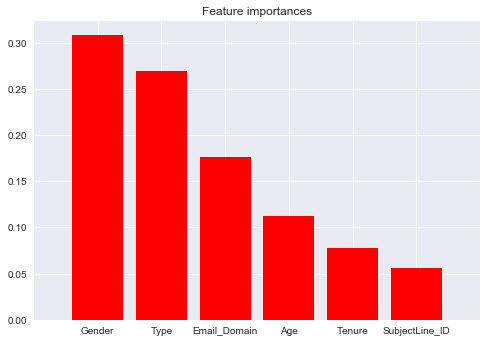

In [32]:
importances = RF.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r",align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout
plt.show()

See that Gender and Type  where the features our algorithm considered to be more important. The feature importance is distributed as shown by the graph above.

In [33]:
# Test customer, encoded attributes:
customer = [2,1,3,50,12,3]

print(RF.predict(customer))

[0]


C:\Users\Riko\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Our model suggests that this particular customer won't respond to the e-mail (probability = 76.31%).

Q10: Represent graphically the Open Rate by taking into consideration the Age, Type and Gender

Two boxplots of Avg.Open Rate vs Type and vs Gender.

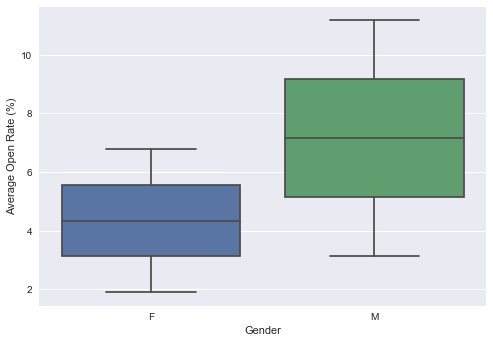

In [17]:
open_rate = merged_df[['Type','Gender','Valid_Response',]].groupby(['Type','Gender'],as_index = False).sum()
open_rate['Average Open Rate (%)'] = (open_rate['Valid_Response']/len(merged_df))*100
open_rate = open_rate.drop('Valid_Response', axis =1)


sns.boxplot(open_rate.Gender,open_rate['Average Open Rate (%)'])

The median value for the female customers is lower than the median for male customers. It seems that men tend to respond a little more than women.

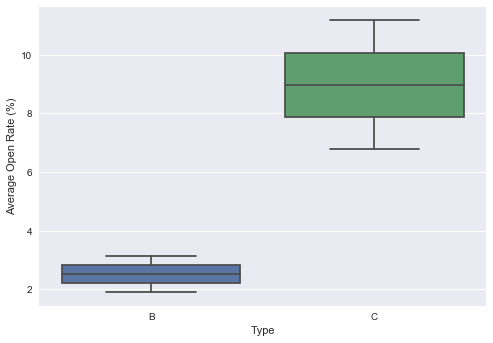

In [18]:
sns.boxplot(open_rate.Type,open_rate['Average Open Rate (%)'])

Business customers respond way lower than consumers. 

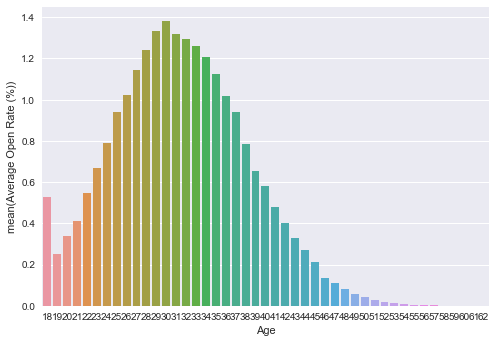

In [22]:
age_open_rate = merged_df[['Age','Valid_Response',]].groupby(['Age'],as_index = False).sum()
age_open_rate['Average Open Rate (%)'] = (age_open_rate['Valid_Response']/len(merged_df))*100
age_open_rate = age_open_rate.drop('Valid_Response', axis =1)

sns.barplot(age_open_rate.Age,age_open_rate['Average Open Rate (%)'])

It's clear that the open rate is higher for the ages that are the most common ones to our user base. Ages 26 to 36 tend to respond a little above 1%, while the highest open rate is for customers aged 30 years old with about 1.38% opening rate.